<a href="https://colab.research.google.com/github/docdecoder/javainfant/blob/master/Copy_of_DHAI_B7_M3_AST_01_Basic_Probability_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Health and Imaging
## A program by IISc and TalentSprint
### Assignment 1: Probability basics

## Learning Objectives

   
  At the end of the experiment, you will be able to understand about:
  * Conditional probability and chain rule
  * Bayes theorem
  * Maximum Likelihood Estimation
  * Prior and Posterior Distribution


## Assignment walkthrough video(Introduction to notebook)

[Please click here](https://cdn.exec.talentsprint.com/content/DHAI_B5_M3_AST_01_Basic_Probability_C_ipynb_Colaboratory_and_1_more_page_Personal_Microsoft_Edge_2022_12_11_17_14_23.mp4)

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "DHAI_B7_M3_AST_01_Basic_Probability_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dhai-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Please enter valid Id


### Conditional Probability

The probability of the occurence of an event A given a condition that event B occurs is known as conditional probability.

This can be written as : P(A | B) or P(A given B)

Furthermore, the conditional probability for events A given event B is calculated as follows:

$P(A | B)$ = $\frac{P(A \cap B)}{P(B)}$ , where $P(B)\neq0$

**Special Cases of Conditional Probability**

1. A and B are disjoint: Here $A \cap B = \Phi $, this denotes that A and B cannot occur at the same time.

  $P(A|B) = \frac{P(A \cap B)} {P(B)}= 0$



2. B is a subset of A: If B is a subset of A, then whenever B happens, definitely A must have happened too. Therefore, $A \cap B = B$

  $P(A|B) = \frac{P(A \cap B)} {P(B)}$

  $P(A|B) = \frac{P(B)} {P(B)} = 1$, since $A \cap B = B$


3. A is a subset of B: Here, $A \cap B = A$

  $P(A|B) = \frac{P(A \cap B)} {P(B)}$

  $P(A|B) = \frac{P(A)} {P(B)} $, since $A \cap B = A$


1. A fair die is rolled. Assume, A is an event that the outcome is an even number, i.e., A={2,4,6}. Next, let B be the event where the outcome is greater than or equal to 4, i.e., B={4,5,6}. Find the following:

  a. Probability of A
  
  b. Probability of A given B

  Calculating probability of occurence of event A i.e.$P(A)$

In [ ]:
# Total number of outcomes of a die is 6
S = 6
# Total number of outcomes of event A having even numbers i.e. A = {2, 4, 6} is 3.
A = 3
# Probability of getting an even number when a die is rolled
P_A = A/S
print(P_A)

0.5


Calculating probability of event A given B i.e. $P(A|B)$

To calculate conditional probability we can use the formula as $P(A | B)$ = $\frac{\left | A \cap B \right |}{\left | B \right |}$      

Further, as event B has already occured, the outcome of B is {4,5,6}. Also, event A's outcome is {2,4,6}. Therefore, the outcome of the event A when B has already occured will be $A \cap B$ which is {4,6}

In [ ]:
# Declaring number of events of |A intersection B|=2 as A_B
A_B = 2
# Declaring number of events of |B| = 3
B = 3
# Probability of event A given B is calculated as follows
P_AB = (A_B)/B
print(P_AB)

0.6666666666666666


### Chain Rule of Conditional Probabilities

By now, we know about conditional probability. Further, what if we are interested in knowing the probability of intersections like $A \cap B$ or $A_{1} \cap A_{2} \cap A_{3} \cap,....,A_{n}$. For this, let us take the formula of conditional probability to derive "**chain rule of conditional probability**".

Rewriting Conditional Probability in the below format:

  $P(A \cap B)=P(A)P(B|A)=P(B)P(A|B)$.........................(1)

  Above formula for three events will be:

  $P(A \cap B \cap C)= P(A \cap (B \cap C))= P(A)P(B \cap C |A)$

  Now, as we know $P(B \cap C) = P(B)P(C|B)$  (from equation 1)

  Apply the condition A on both the sides, we get

  $P(B \cap C|A)=P(B|A)P(C|A,B)$...............................(2)

  From equation 1 and 2, we get

  $P(A \cap B \cap C)=P(A)P(B|A)P(C|A,B)$






  Finally, the general formula for n events will be

  $P(A_{1} \cap A_{2} \cap....\cap A_{n}) = P(A_{1})P(A_{2}|A_{1})P(A_{3}|A_{2}A_{1}).....P(A_{n}|A_{n-1}A_{n-2}....A_{1})$


1. There is a tyre manufacturing factory that produces 250 units per month, 17 of which are defective. We pick 3 units out of 250 units at random. What is the probability that none of them are defective?

  **Explanation**: Here, we are picking up 3 units at random. This can be considered as 3 events $A_{1}$, $A_{2}$, and $A_{3}$ of picking up non-defective units. Thus, we have to find the $P(A_{1} \cap A_{2} \cap A_{3})$.

Let us first find the probability of event $A_{1}$

In [ ]:
# Declaring units of production, total number of non-defective units, and number of defective units
total_units = 250
defec_u = 17
n_defec = total_units - defec_u # There are 233 not defective units
print(n_defec)
# Probability of picking up the non-defective units for the first time (Event A1)
P1=n_defec/total_units
P1

233


0.932

Now, the next item will be chosen from 232 not defective units and 17 defective units. This means we have to calculate $P(A_{2}|A_{1})$

In [ ]:
# The non-defective units will be 1 less than the previous one as we have already picked up one unit
n_defec_2 = n_defec - 1
# Probability of picking up the non-defective units for the second time (Event A2)
total_units_1=249
print(n_defec_2)
P2 = n_defec_2 / (total_units-1)
P2

232


0.9317269076305221

Further, given that $A_{1}$ and $A_{2}$ has occured, we have to find the probability of chosing the 3rd unit.

The third unit will be chosen from 231 not defective units and 17 defective units.

In [ ]:
# Again, the non-defective units will be 1 less than the previous one (Event A2)
n_defec_3 = n_defec_2 - 1
total_units_2= 248
print(n_defec_3)
P3 = n_defec_3/(total_units-2)
P3

231


0.9314516129032258

The final probability will be calculated as per the below formula:

 $P(A_{1} \cap A_{2} \cap A_{3})$ = $P(A_{1})P(A_{2}|A_{1})P(A_{3}|A_{2},A_{1})$

In [ ]:
# Final probability as per the condition
P1 = 233 / 250
P2 = 232/ 249
P3 = 231 / 248
P = P1 * P2 * P3
print(f"Probability that none of the 3 units out of 250 units picked at random are defective is: {P}")

Probability that none of the 3 units out of 250 units picked at random are defective is: 0.8088441507967353


### Bayes Theorem

By now, we already know about conditional probability and how to calculate it. Further, suppose that we know P(A|B), but we are interested in the probability P(B|A). We can calculate it using the below formula derived for Bayes Theorem:

$P(B|A) = \frac {P(A|B)P(B)}{P(A)}$ where $P(A)\neq0$

It can also be written as:

$P(B_{j}|A) = \frac {P(A|B_{j})P(B_{j})}{\sum_{i} P(A|B_{i})P(B_{i})}$

where $B_{1},B_{2},...,B_{n}$ form a partition of the sample space.



1. Suppose there are three bags where each bag contains 100 marbles:

  a). Bag 1 has 75 red and 25 blue marbles

  b). Bag 2 has 60 red and 40 blue marbles

  c). Bag 3 has 45 red and 55 blue marbles

  We choose one of the bags at random and then pick a random marble from the chosen bag. Further, we observe that the chosen marble is red. What is the probability that the bag chosen was Bag 1?



In [ ]:
from os import P_ALL
# Probability of picking up the marbles from Bag 1, Bag 2, and Bag 3
P_B1 = 1/3
P_B2 = 1/3
P_B3 = 1/3
# Probability of picking up the red marbles from Bag 1, Bag 2, and Bag 3
PR_B1 = 0.75
PR_B2 = 0.60
PR_B3 = 0.45

# Probability of the event where chosen marble is red
P_Red= (PR_B1*P_B1+ PR_B2*P_B2+ PR_B3*P_B3)
print (P_Red)
# YOUR CODE HERE

0.6


Here, we know $P(R|B_{i})$, but, to calculate the probability that Bag 1 was chosen $P(B_{1}|R)$ we will follow the **Bayes rule**.

$P(B_{1}|R) = \frac{P(R|B_{1})P(B_{1})}{P(R)}$

In [ ]:
# Probability that Bag 1 was chosen
# YOUR CODE HERE

P_B1R = (PR_B1*P_B1)/P_Red
P_B1R

0.4166666666666667

### Maximum Likelihood Estimation

**Maximum Likelihood Estimation:** Maximum likelihood estimation is a method that determines maximum values for the parameter of a model.

9. Build 1000 data points from the normal distribution with  mean = 1 and standard deviation = 5. Estimate their maximum likelihood of mean, variance, and standard deviation from the data.

In [ ]:
import numpy as np
import seaborn as sns

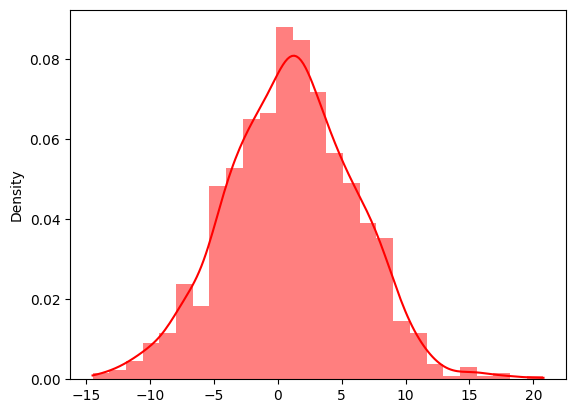

In [ ]:
# Building the distributed data from mean and standard deviation
mean = 1
std = 5
N_points = 1000

#  Finding the random normal distributed data
data = np.random.normal(mean, std, N_points)
sns.histplot(data, kde=True, color="red", stat="density", linewidth=0);

In [ ]:
# Printing the original mean and variance
print('Original mean is '+str(mean) + ', variance is ' + str(std**2)," and standard deviation is " +str(std))

Original mean is 1, variance is 25  and standard deviation is 5


In [ ]:
# Calculating the mean from the data
mu_ML = 1/N_points * sum(data)
print('Maximum likelihood estimation of mean from the normal distributed data is '+str(mu_ML))

Maximum likelihood estimation of mean from the normal distributed data is 1.0420122944478145


In [ ]:
# Calculating the variance from the data
var_ML = (1/(N_points-1)) * sum([(x-mu_ML) ** 2 for x in data])
print('Maximum likelihood estimation of variance from the normal distributed data is ' + str(var_ML))

Maximum likelihood estimation of variance from the normal distributed data is 25.312199854268485


In [ ]:
import math
# Calculating the standard deviation from the data
std_ML = math.sqrt(var_ML)
print("Maximum likelihood estimation of standard deviation from the normal distributed data is  "+str(std_ML))

Maximum likelihood estimation of standard deviation from the normal distributed data is  5.031123120563487


### Bayesian inference

**Bayesian inference :**- Bayesian inference is a method of statistical inference in which Baye's theorem is used to update the probability for a hypothesis as more evidence or information becomes available. Bayesian inference is an important technique in statistics, and especially in mathematical statistics.

The core of Bayesian Inference is to combine two different distributions (likelihood and prior) into one “smarter” distribution (posterior). Posterior is **“smarter” in the sense that the classic maximum likelihood estimation (MLE) doesn’t take into account a prior**. Once we calculate the posterior, we use it to find the “best” parameters and the **“best” is in terms of maximizing the posterior probability**, given the data. This process is called Maximum A Posteriori (MAP).

Bayesian Inference has three steps.

Step 1. **[Prior] Choose a PDF to model your parameter θ**, aka the prior distribution **P(θ)**. This is **your best guess** about parameters **before** seeing the data **X**.

Step 2. **[Likelihood] Choose a PDF for $P(X|θ)$**. Basically you are modeling how the data **$X$** will look like given the parameter **$θ$**.

Step 3. **[Posterior] Calculate the posterior** distribution **$P(θ|X)$** and pick the **$θ$ that has the highest $P(θ|X)$**.

And the posterior becomes the new prior. Repeat step 3 as you get more data.


**Formula for calculating Posterior**

$P(θ|X) = \frac{P(X|θ).P(θ)}{\int P(X|θ).P(θ).dθ}$

where, $P(θ|X)$ = Posterior, $P(X|θ)$ = Sampling, $P(θ)$ = Prior, $dθ$ = Normalizing constant


10. Bob is selecting one marble from two bowls of marbles. The first bowl has 75 red marbles and 25 blue marbles. The second bowl has 50 red marbles and 50 blue marbles. Given that Bob is equally likely to choose from either bowl and does not discriminate between the marbles themselves, Bob in fact chooses a red marble. What is the probability Bob picked the marble from bowl 1 and bowl 2?

In [ ]:
# Probability of fetching the marble from bowl
P_H_1 = P_H_2 = 0.5

# Probability of fetching the red marble from first bowl
P_E_H_1 = 75/100

# Probability of fetching the marble from second bowl
P_E_H_2 = 50/100

# Applying the Bayesian formula to pick the red marble from first bowl
# YOUR CODE HERE
P_H_1_E = (P_E_H_1*P_H_1)/((P_E_H_1*P_H_1)+(P_E_H_2*P_H_2))
P_H_2_E = (P_E_H_2*P_H_2)/((P_E_H_1*P_H_1)+(P_E_H_2*P_H_2))
print("The probability of fetching the red marble from bowl 1 is "+str(P_H_1_E)+ " and from bowl 2 is "+str(P_H_2_E))


The probability of fetching the red marble from bowl 1 is 0.6 and from bowl 2 is 0.4


### Prior and Posterior distribution

**Prior distribution:**
A Prior distribution represents your belief about the true or false value of a parameter. It shows your “best guess.”

**Posterior distribution:**  The posterior distribution summarizes what you know after the data has been observed. The summary of the evidence from the new observations is the likelihood function.
It is represented as $Posterior$ $Distribution$ $=$ $Prior$ $Distribution + Likelihood$ $Function (“new$ $evidence”)$

11. Consider a scenario, where, an education management company conducts free sessions on YouTube on various topics related to Deep Learning. Everytime a session is conducted, around 4000 people actively attends it. After the experts closes the session, a feedback is asked from the attendees. Some people liked the session and some don't. Now, we would like to make predictions about what percentage of people will engage and like when we conduct a session in the future, so that the company can understand about the potential participants willing to continue learning by enrolling in their professional courses.



Let's generate the data X.

In [ ]:
np.set_printoptions(threshold=100)

# Generating 4,000 participants reponse.
# Assuming the 'likes' or 'dislikes' follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means liked. 0 means dislike.

# We pick the success rate of 30%.
liked_prob = 0.3

# IID (independent and identically distributed) assumption
liked_data = np.random.binomial(n=1, p=liked_prob, size=4000)

Let us have a look at liked data.

In [ ]:
print(liked_data)

[0 0 0 ... 0 0 0]


In [ ]:
len(liked_data)

4000

Firstly, we will choose the PDF to model the parameter $\theta$.

Note : $\theta$ is the **'liking'** probability.


`i) What kind of probability distributions should we use to model a probability?`

**Explaination**: Since, we have only one thing to predict, we will use a Beta distribution. It has two parameters, $α$ & $β$, that we need to decide. You can think of $α$ as How many people liked (the number of successes) and $β$ as how many people did’t liked (the number of failures). These parameters — how big or small $α$ & $β$ are — will determine the shape of the distribution.

`ii) Let us assume that we have 800 people out of 4000 who liked the session. Write this in terms of beta distribution and plot the prior distribution with respect to all` $\theta$ `values`.

In [ ]:
from scipy import stats
# Declaring alpha and beta
alpha = 800
beta = 4000 - alpha

# domain θ
theta_range = np.linspace(0, 1, 2000)

# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=alpha, b=beta)

Plotting the distribution

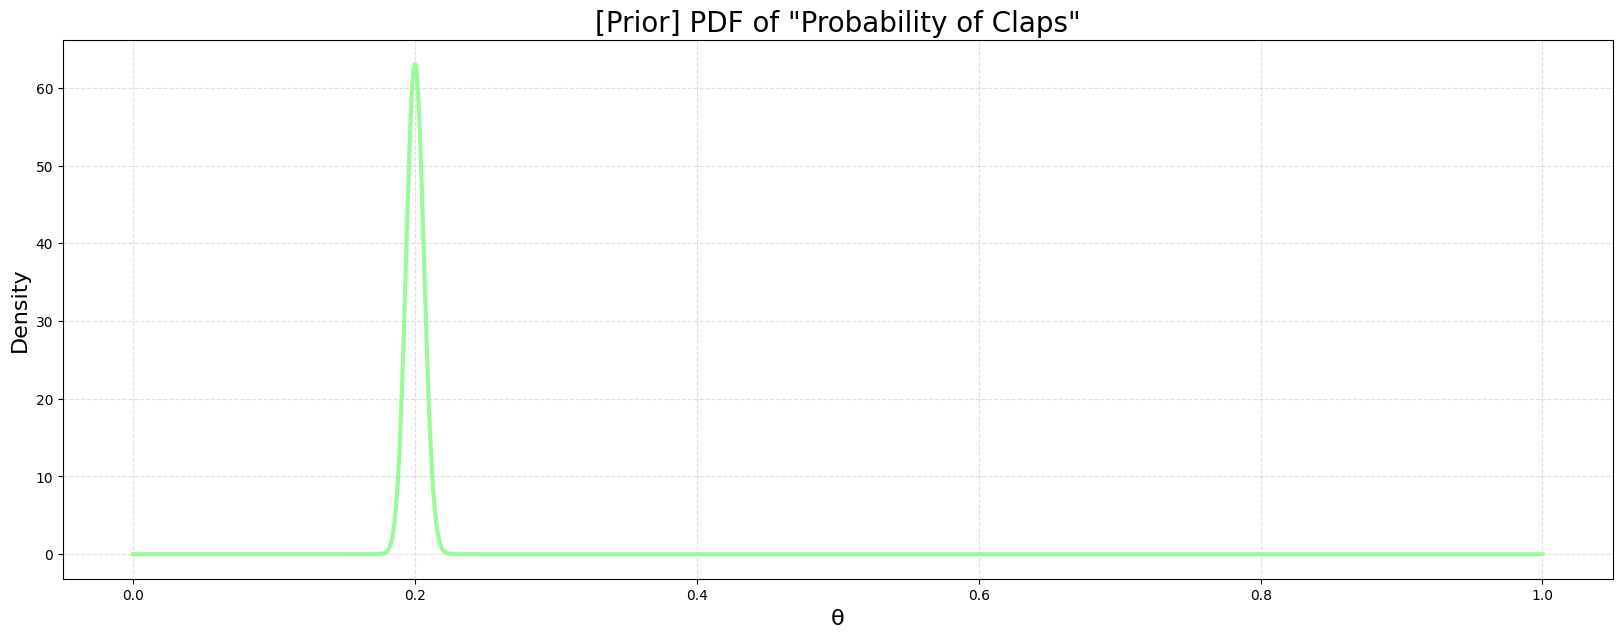

In [ ]:
import matplotlib.pyplot as plt
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')

# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)

# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()

We can observe from the above plot that it spikes at 20% (800 likes / 4000 participants) as expected.

Further, lets get into step 2 which is Likelihood $P(X|θ)$.

Choose a probability model for $P(X|θ)$, the probability of seeing the data $X$ given a particular parameter $θ$. We can also call Likelihood as a sampling distribution.

`iii) Find out which probability distribution should be used to model the sampling distribution and the likelihood?`




**Hint:** Since $X$ is binary, and we also have the total number of participants $(n)$ and we want the probability of liked $(p)$. So, we can use Binomial Distribution with $n$ and $p$.

In [ ]:
# The sampling dist P(X|θ) with a prior θ
likelihood = stats.binom.pmf(k = np.sum(liked_data), n = len(liked_data), p = alpha/(alpha+beta))
print(likelihood)

7.928302349605436e-46


`iv)` `Plot the graph for` $P(X|θ)$ `for all possible` $θ$.












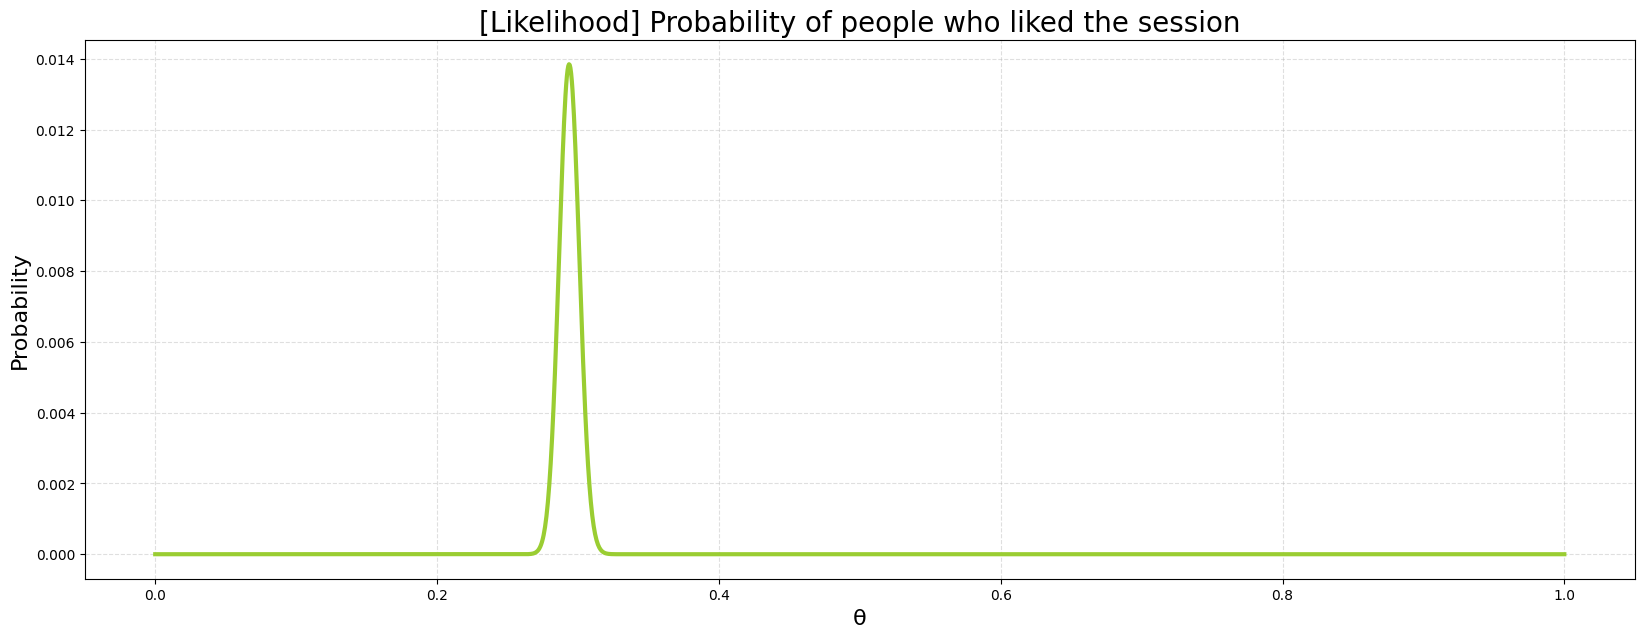

In [ ]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(liked_data), n = len(liked_data), p = theta_range)

# Create the plot
fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')

# Add a title
plt.title('[Likelihood] Probability of people who liked the session' , fontsize=20)

# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Probability', fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()

Now, we will try to calculate the posterior distribution.

Even though there are thousands of data points, we can convert them into a single scalar — the likelihood **$P(X|θ)$ — by plugging data into the model that you choose** (in this example, the binomial distribution).

Then, we calculate **$P(θ)$ & $P(X|θ)$** for a specific **$θ$** and multiply them together. If you do this for every possible **$θ$**, you can pick the highest **$P(θ)$ * $P(X|θ)$** among different **$θ’s$**.

Your initial guess about parameters was **$P(θ)$**. Now you are **upgrading a simple $P(θ)$ into something more informative — $P(θ|X)$ — as more data become available.**
**$P(θ|X)$** is still the probability of **$θ$**, just like **$P(θ)$** is. However, **$P(θ|X)$** is a smarter version of **$P(θ)$**.

`v). Calculate the Posterior Distribution` $P(θ|X)$?

In [ ]:
# Finding the Prior
theta_range_e = theta_range + 0.001
prior = stats.beta.cdf(x = theta_range_e, a=alpha, b=beta) - stats.beta.cdf(x = theta_range, a=alpha, b=beta)
# prior = stats.beta.pdf(x = theta_range, a=alpha, b=beta)

# Finding likelihood
likelihood = stats.binom.pmf(k = np.sum(liked_data), n = len(liked_data), p = theta_range)

# Element-wise multiplication
posterior = likelihood * prior
normalized_posterior = posterior / np.sum(posterior)

**Note:** We calculated the prior by subtracting two `stats.beta.cdf` instead of using `stats.beta.pdf` because the likelihood `stats.binom.pmf` is a probability while `stats.beta.pdf` returns a density. Even if we use the density to calculate the posterior, it won’t change the optimization result. However, if you want the units to match, converting a density into a probability is necessary.

`vi). Plot the graph for Prior, Likelihood, and Posterior together.`

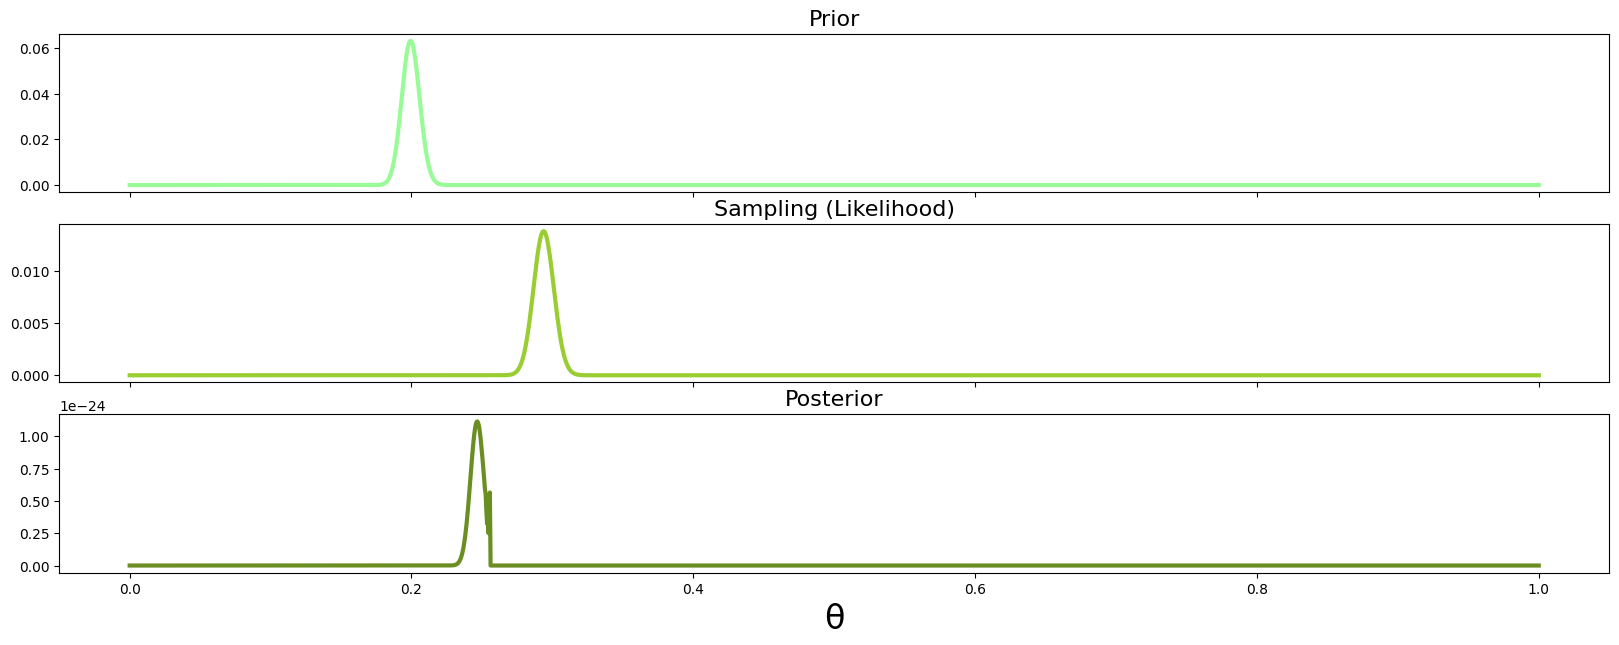

In [ ]:
# Plotting all three together
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

When you look at the posterior graph (the 3rd one), **notice it is where the likelihood shifted toward the prior**. The **liked** probability for the prior was 20%. The **liked** probability for the data was given as 30%. Now, the posterior has its peak around 0.25%.

Also, notice the width of the bell curves in prior/likelihood has shrunk in the posterior. Because we incorporated more information through sampling, the range of possible parameters is now narrower.

The more data you gather, the graph of the posterior will look more like that of the likelihood and less like that of the prior. In other words, as you get more data, the original prior distribution matters less.

Finally, we can pick **$\theta$ that gives the highest posterior** computed by numerical optimization, such as the Gradient Descent or newton method. This whole iterative procedure is called **Maximum A Posteriori estimation (MAP)**.

12. Construct a prior and posterior distribution with some binominal random distribution techniques.

In [ ]:
def bern_post(n_params=1000, n_sample=1000, true_p=.5, prior_p=.5, n_prior=1000):
    # Creating the samples
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)

    # Calculating the Likelihood
    likelihood = np.array([np.product(stats.bernoulli.pmf(sample, p)) for p in params])
    likelihood = likelihood / np.sum(likelihood)

    # Prior sample
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(stats.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)

    # Finding the posterior
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)

    # Plotting the graph
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()

    return posterior

<ipython-input-43-b4336b45ee65>:7: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  likelihood = np.array([np.product(stats.bernoulli.pmf(sample, p)) for p in params])
<ipython-input-43-b4336b45ee65>:12: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  prior = np.array([np.product(stats.bernoulli.pmf(prior_sample, p)) for p in params])


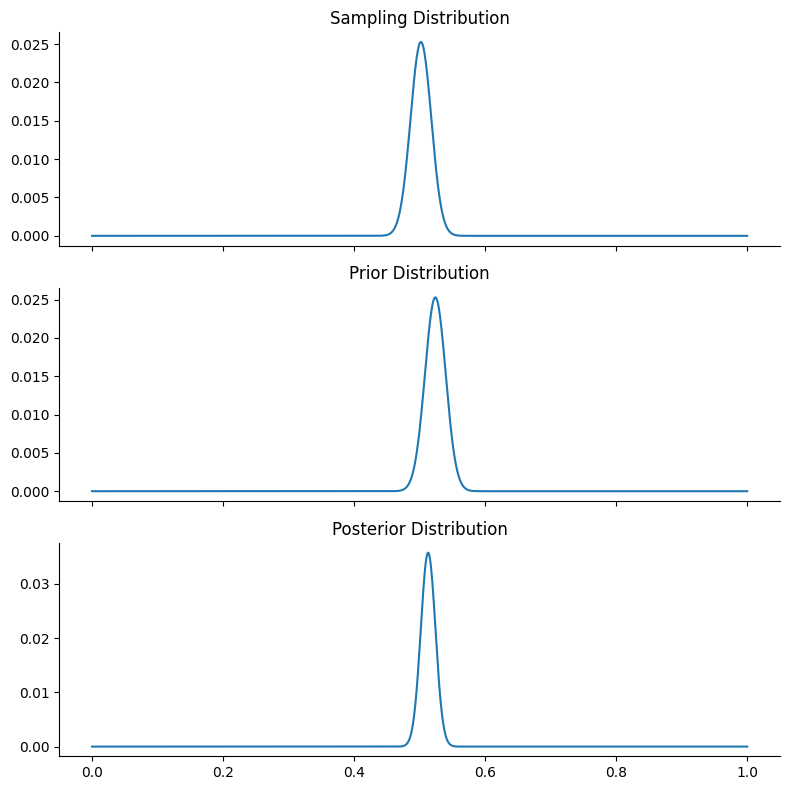

In [ ]:
moredata_post = bern_post(n_sample=1000)

### Please answer the questions below to complete the experiment:




In [ ]:
# @title    A man is known to speak truth 5 out of 8 times. He throws a die and reports that it is a four. Find the probability that it is actually a four. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "1/4" #@param ["","1/8","3/8", "1/4","3/4"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "not too easy" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")